In [13]:
import DataPrep
import FeatureSelection
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 3278)	1
  (0, 7728)	1
  (0, 615)	1
  (0, 11296)	1
  (0, 11036)	1
  (0, 10709)	1
  (0, 5115)	1
  (0, 8376)	1
  (0, 6639)	1
  (0, 1044)	1
  (0, 10988)	1
  (0, 9676)	1
  (1, 751)	1
  (1, 1964)	1
  (1, 4910)	1
  (1, 8554)	1
  (1, 5687)	1
  (1, 1532)	1
  (1, 11110)	1
  (1, 10980)	1
  (1, 7674)	1
  (1, 11138)	1
  (1, 4860)	1
  (1, 7418)	1
  (1, 10426)	2
  :	:
  (10239, 6853)	1
  (10239, 10594)	1
  (10239, 3989)	1
  (10239, 10918)	1
  (10239, 8996)	1
  (10239, 10660)	1
  (10239, 2549)	1
  (10239, 11622)	1
  (10239, 2568)	1
  (10239, 799)	1
  (10239, 11660)	2
  (10239, 12158)	1
  (10239, 3309)	1
  (10239, 11004)	1
  (10

In [14]:
#string to test
doc_new = ['obama is running for president in 2019']

In [15]:
#The feature selection has been done in FeatureSelection.py
# Here we will create models using those features for prediction

##### Building classifier using naive bayes 

In [17]:
nb_pipeline = Pipeline([
        ('NBCV',FeatureSelection.countV),
        ('nb_clf',MultinomialNB())])
nb_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb = nb_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb == DataPrep.test_news['Label'])

0.6072128577028616

##### Building classifier using logistic regression

In [18]:
logR_pipeline = Pipeline([
        ('LogRCV',FeatureSelection.countV),
        ('LogR_clf',LogisticRegression(solver='lbfgs',max_iter=10000))
        ])

logR_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR = logR_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR == DataPrep.test_news['Label'])


0.5985887887103096

#### Building classifier using Linear SVM

In [19]:
svm_pipeline = Pipeline([
        ('svmCV',FeatureSelection.countV),
        ('svm_clf',svm.LinearSVC(max_iter=1000))
        ])

svm_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm = svm_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm == DataPrep.test_news['Label'])

C:\Users\Harikesh\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5723245785966288

#### Building classifier using SVM Stochastic Gradient Descent on hinge loss

In [20]:
sgd_pipeline = Pipeline([
       ('svm2CV',FeatureSelection.countV),
       ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=10,tol=0.21))
       ])

sgd_pipeline.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd = sgd_pipeline.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd == DataPrep.test_news['Label'])

0.6017248137985104

#### Building classifier using random forest

In [21]:
random_forest = Pipeline([
       ('rfCV',FeatureSelection.countV),
       ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
       ])
   
random_forest.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf = random_forest.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf == DataPrep.test_news['Label'])

0.6181889455115641

#### User defined functon for K-Fold cross validatoin

In [22]:
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=2)
    scores = []
    confusion = np.array([[0,0],[0,0]])
    X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
    
    for train_ind, test_ind in k_fold.split(X):
        train_text = DataPrep.train_news.iloc[train_ind]['Statement'] 
        train_y = DataPrep.train_news.iloc[train_ind]['Label']
    
        test_text = DataPrep.train_news.iloc[test_ind]['Statement']
        test_y = DataPrep.train_news.iloc[test_ind]['Label']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print('Total statements classified:', len(DataPrep.train_news)),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

#### K-fold cross validation for all classifiers

In [23]:
build_confusion_matrix(nb_pipeline)
# build_confusion_matrix(logR_pipeline)
# build_confusion_matrix(svm_pipeline)
# build_confusion_matrix(sgd_pipeline)
# build_confusion_matrix(random_forest)

Total statements classified: 10240
Score: 0.6666666666666666
score length 2
Confusion matrix:
[[0 2]
 [0 2]]


(None, None, None, None, None)

#### Building classifier using naive-bayes

In [24]:
nb_pipeline_ngram = Pipeline([
        ('nb_tfidf',FeatureSelection.tfidf_ngram),
        ('nb_clf',MultinomialNB())])

nb_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_nb_ngram = nb_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_nb_ngram == DataPrep.test_news['Label'])

0.5938847510780086

#### Building classifier using logistic regression

In [25]:
logR_pipeline_ngram = Pipeline([
        ('LogR_tfidf',FeatureSelection.tfidf_ngram),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1,solver='lbfgs'))
        ])

logR_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR_ngram = logR_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR_ngram == DataPrep.test_news['Label'])

0.6193649549196394

#### Building classifier using Linear SVM

In [26]:
svm_pipeline_ngram = Pipeline([
        ('svm_tfidf',FeatureSelection.tfidf_ngram),
        ('svm_clf',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_svm_ngram = svm_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_svm_ngram == DataPrep.test_news['Label'])

0.6170129361034888

#### Building classifier using Stochastic Gradient Descent (SGD)

In [27]:
sgd_pipeline_ngram = Pipeline([
        ('sgd_tfidf',FeatureSelection.tfidf_ngram),
        ('sgd_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, max_iter=50,tol=0.21))
        ])

sgd_pipeline_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_sgd_ngram = sgd_pipeline_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_sgd_ngram == DataPrep.test_news['Label'])

0.5417483339866719

#### Building classifier using random forest

In [28]:
random_forest_ngram = Pipeline([
       ('rf_tfidf',FeatureSelection.tfidf_ngram),
       ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3))
       ])
   
random_forest_ngram.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf_ngram = random_forest_ngram.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf_ngram == DataPrep.test_news['Label'])

0.6032928263426107

#### K-fold cross validation for all classifiers

In [29]:
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
# build_confusion_matrix(random_forest_ngram)

Total statements classified: 10240
Score: 1.0
score length 2
Confusion matrix:
[[2 0]
 [0 2]]
Total statements classified: 10240
Score: 0.6666666666666666
score length 2
Confusion matrix:
[[0 2]
 [0 2]]
Total statements classified: 10240
Score: 0.6666666666666666
score length 2
Confusion matrix:
[[0 2]
 [0 2]]
Total statements classified: 10240
Score: 0.8333333333333333
score length 2
Confusion matrix:
[[1 1]
 [0 2]]


(None, None, None, None, None)

In [30]:
print(classification_report(DataPrep.test_news['Label'], predicted_nb_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_LogR_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_svm_ngram))
print(classification_report(DataPrep.test_news['Label'], predicted_sgd_ngram))
# print(classification_report(DataPrep.test_news['Label'], predicted_rf_ngram))

DataPrep.test_news['Label'].shape

              precision    recall  f1-score   support

       False       0.72      0.19      0.30      1169
        True       0.58      0.94      0.71      1382

   micro avg       0.59      0.59      0.59      2551
   macro avg       0.65      0.56      0.51      2551
weighted avg       0.64      0.59      0.52      2551

              precision    recall  f1-score   support

       False       0.64      0.39      0.49      1169
        True       0.61      0.81      0.70      1382

   micro avg       0.62      0.62      0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551

              precision    recall  f1-score   support

       False       0.61      0.47      0.53      1169
        True       0.62      0.74      0.68      1382

   micro avg       0.62      0.62      0.62      2551
   macro avg       0.61      0.61      0.60      2551
weighted avg       0.62      0.62      0.61      2551

              preci

C:\Users\Harikesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Harikesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Harikesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(2551,)

#### Logistic Regression parameters

In [31]:
parameters = {'LogR_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'LogR_tfidf__use_idf': (True, False),
               'LogR_tfidf__smooth_idf': (True, False)
}

gs_clf = GridSearchCV(logR_pipeline_ngram, parameters, n_jobs=-1, cv=5, return_train_score=True)
gs_clf = gs_clf.fit(DataPrep.train_news['Statement'][:10000],DataPrep.train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

{'mean_fit_time': array([ 0.8650876 ,  0.67499595,  0.69953132,  0.59600739,  3.12105222,
         3.55489535,  3.27663689,  3.49006381,  5.84066887,  7.2863111 ,
         5.31857505,  7.23924003,  6.37415037,  8.27546363,  6.30932126,
         8.29860234,  7.87693057, 12.03720527,  9.21316333, 10.38375692]),
 'std_fit_time': array([0.07882487, 0.04629213, 0.01033778, 0.04918175, 0.16313624,
        0.20447634, 0.67681713, 0.3290763 , 1.13925427, 0.39362705,
        0.44238914, 0.25675977, 0.6452461 , 0.9551358 , 0.70247206,
        0.75238208, 0.86478133, 0.71376853, 1.0666267 , 0.56558964]),
 'mean_score_time': array([0.07699223, 0.08038406, 0.07878747, 0.07699299, 0.17433319,
        0.19448056, 0.19827104, 0.14521484, 0.23038535, 0.23417315,
        0.28703318, 0.25032754, 0.23238196, 0.2569222 , 0.22220864,
        0.25851254, 0.28922815, 0.34807081, 0.35644188, 0.29814367]),
 'std_score_time': array([0.00247766, 0.00850137, 0.0061815 , 0.00765901, 0.03187903,
        0.05377705, 

#### Linear SVM parameters

In [33]:
parameters = {'svm_tfidf__ngram_range': [(1, 1), (1, 2),(1,3),(1,4),(1,5)],
               'svm_tfidf__use_idf': (True, False),
               'svm_tfidf__smooth_idf': (True, False),
               'svm_clf__penalty': ('l1','l2'),
}

gs_clf = GridSearchCV(svm_pipeline_ngram, parameters, n_jobs=-1, cv=5, return_train_score=True,error_score=0.0)
gs_clf = gs_clf.fit(DataPrep.train_news['Statement'][:10000],DataPrep.train_news['Label'][:10000])

gs_clf.best_score_
gs_clf.best_params_
gs_clf.cv_results_

{'mean_fit_time': array([0.50365229, 0.48031149, 0.44999471, 0.35823636, 1.19340777,
        1.34619818, 1.36036024, 1.25584044, 1.82611661, 1.61128964,
        1.64559827, 1.47206178, 2.78335576, 2.20310693, 2.3217886 ,
        2.18236284, 2.72291856, 2.55456781, 2.89864969, 2.8816916 ,
        0.45697742, 0.52958364, 0.54614024, 0.54773469, 1.53528829,
        1.11182671, 1.04321256, 1.09646163, 1.68289685, 1.66015902,
        1.72717886, 1.63901772, 2.95741282, 3.38594151, 2.99102807,
        3.75336609, 3.12424498, 3.2020359 , 3.23355012, 3.35981035]),
 'std_fit_time': array([0.03916896, 0.02571261, 0.03036592, 0.01050268, 0.09102592,
        0.07420291, 0.03797547, 0.02387304, 0.0313483 , 0.05291226,
        0.03202082, 0.04350512, 0.182293  , 0.0748277 , 0.12454967,
        0.15798376, 0.11796597, 0.11514162, 0.13473082, 0.1958148 ,
        0.01490453, 0.11777455, 0.10909393, 0.12806502, 0.2852079 ,
        0.14848046, 0.10094447, 0.13755933, 0.1024291 , 0.09234277,
        0.110

Running both random forest and logistic regression models again with best parameter found with GridSearch method


##### Random Forest with best parameters

In [34]:
random_forest_final = Pipeline([
       ('rf_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,3),use_idf=True,smooth_idf=True)),
       ('rf_clf',RandomForestClassifier(n_estimators=300,n_jobs=3,max_depth=10))
       ])
   
random_forest_final.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_rf_final = random_forest_final.predict(DataPrep.test_news['Statement'])
np.mean(predicted_rf_final == DataPrep.test_news['Label'])
print(classification_report(DataPrep.test_news['Label'], predicted_rf_final))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      1169
        True       0.54      1.00      0.70      1382

   micro avg       0.54      0.54      0.54      2551
   macro avg       0.27      0.50      0.35      2551
weighted avg       0.29      0.54      0.38      2551



C:\Users\Harikesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Harikesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Harikesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Logistic Regression with best parameters

In [35]:
logR_pipeline_final = Pipeline([
        #('LogRCV',countV_ngram),
        ('LogR_tfidf',TfidfVectorizer(stop_words='english',ngram_range=(1,5),use_idf=True,smooth_idf=False)),
        ('LogR_clf',LogisticRegression(penalty="l2",C=1))
        ])

logR_pipeline_final.fit(DataPrep.train_news['Statement'],DataPrep.train_news['Label'])
predicted_LogR_final = logR_pipeline_final.predict(DataPrep.test_news['Statement'])
np.mean(predicted_LogR_final == DataPrep.test_news['Label'])
#accuracy = 0.62
print(classification_report(DataPrep.test_news['Label'], predicted_LogR_final))


C:\Users\Harikesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

       False       0.64      0.38      0.48      1169
        True       0.61      0.82      0.70      1382

   micro avg       0.62      0.62      0.62      2551
   macro avg       0.62      0.60      0.59      2551
weighted avg       0.62      0.62      0.60      2551



In [36]:
# saving best model to the disk
model_file = 'final_model.sav'
pickle.dump(logR_pipeline_ngram,open(model_file,'wb'))


#### Plotting Learning curve

In [37]:
def plot_learning_curve(pipeline,title):
    size = 10000
    cv = KFold(size, shuffle=True)
    
    X = DataPrep.train_news["Statement"]
    y = DataPrep.train_news["Label"]
    
    pl = pipeline
    pl.fit(X,y)
    
    train_sizes, train_scores, test_scores = learning_curve(pl, X, y, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
       
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
     
    plt.figure()
    plt.title(title)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

In [38]:
# plot_learning_curve(logR_pipeline_ngram,"Naive-bayes Classifier")
# plot_learning_curve(nb_pipeline_ngram,"LogisticRegression Classifier")
# plot_learning_curve(svm_pipeline_ngram,"SVM Classifier")
#plot_learning_curve(sgd_pipeline_ngram,"SGD Classifier")
#plot_learning_curve(random_forest_ngram,"RandomForest Classifier")

#### Plotting Precision-Recall curve

In [39]:
def plot_PR_curve(classifier):
    
    precision, recall, thresholds = precision_recall_curve(DataPrep.test_news['Label'], classifier)
    average_precision = average_precision_score(DataPrep.test_news['Label'], classifier)
    
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
#    plt.title('2-class Random Forest Precision-Recall curve: AP={0:0.2f}'.format(
#              average_precision))

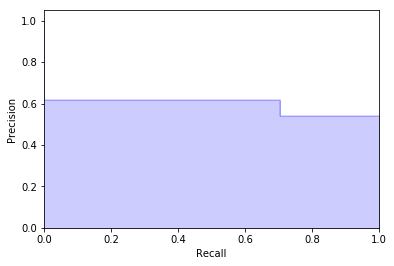

In [40]:
# plot_PR_curve(predicted_LogR_ngram)
plot_PR_curve(predicted_rf_ngram)

#### Extracting the most informative features
Now let's extract the most informative feature from TF-IDF vectorizer for all fo the classifiers and see of there are any common
words that we can identify i.e. are these most informative feature acorss the classifiers are same? we will create a function that 
will extract top 50 features.

In [41]:
def show_most_informative_features(model, vect, clf, text=None, n=50):
    # Extract the vectorizer and the classifier from the pipeline
    vectorizer = model.named_steps[vect]
    classifier = model.named_steps[clf]

     # Check to make sure that we can perform this computation
    if not hasattr(classifier, 'coef_'):
        raise TypeError(
            "Cannot compute most informative features on {}.".format(
                classifier.__class__.__name__
            )
        )
            
    if text is not None:
        # Compute the coefficients for the text
        tvec = model.transform([text]).toarray()
    else:
        # Otherwise simply use the coefficients
        tvec = classifier.coef_

    # Zip the feature names with the coefs and sort
    coefs = sorted(
        zip(tvec[0], vectorizer.get_feature_names()),
        reverse=True
    )
    
    # Get the top n and bottom n coef, name pairs
    topn  = zip(coefs[:n], coefs[:-(n+1):-1])

    # Create the output string to return
    output = []

    # If text, add the predicted value to the output.
    if text is not None:
        output.append("\"{}\"".format(text))
        output.append(
            "Classified as: {}".format(model.predict([text]))
        )
        output.append("")

    # Create two columns with most negative and most positive features.
    for (cp, fnp), (cn, fnn) in topn:
        output.append(
            "{:0.4f}{: >15}    {:0.4f}{: >15}".format(
                cp, fnp, cn, fnn
            )
        )
    #return "\n".join(output)
    print(output)

In [42]:
show_most_informative_features(logR_pipeline_ngram,vect='LogR_tfidf',clf='LogR_clf')
show_most_informative_features(nb_pipeline_ngram,vect='nb_tfidf',clf='nb_clf')
show_most_informative_features(svm_pipeline_ngram,vect='svm_tfidf',clf='svm_clf')
show_most_informative_features(sgd_pipeline_ngram,vect='sgd_tfidf',clf='sgd_clf')


['0.1112        started    -0.0732      abortions', '0.0556took started begin president    -0.0732abortions demand', '0.0556took started begin    -0.0732         annies', '0.0556   took started    -0.0732    annies list', '0.0556           took    -0.0732annies list political', '0.0556started natural gas took    -0.0732annies list political group', '0.0556started natural gas    -0.0732         demand', '0.0556started natural    -0.0732          group', '0.0556started begin president george    -0.0732 group supports', '0.0556started begin president    -0.0732group supports trimester', '0.0556  started begin    -0.0732group supports trimester abortions', '0.0556start started natural gas    -0.0732           list', '0.0556start started natural    -0.0732 list political', '0.0556  start started    -0.0732list political group', '0.0556          start    -0.0732list political group supports', '0.0556president george bushs administration    -0.0732      political', '0.0556president george bus